In [1]:
from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime as utc
import seaborn as sns
import SeisRoutine as sr

In [2]:
client = Client("ETH")
t1 = utc("2015-01-01T00:00:00")
t2 = utc("2015-01-11T00:00:00")
cat = client.get_events(starttime=t1,
                        endtime=t2,
                        includearrivals=True)

In [3]:
# import importlib
# importlib.reload(sr.inspector)

In [4]:
insp = sr.inspector.catalog(cat=cat)
print(insp)

Number of Phases: 469
Number of Attributes: 38


In [5]:
# import importlib
# importlib.reload(sr.plot)

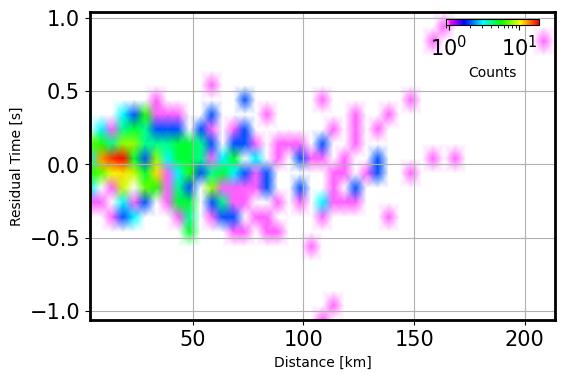

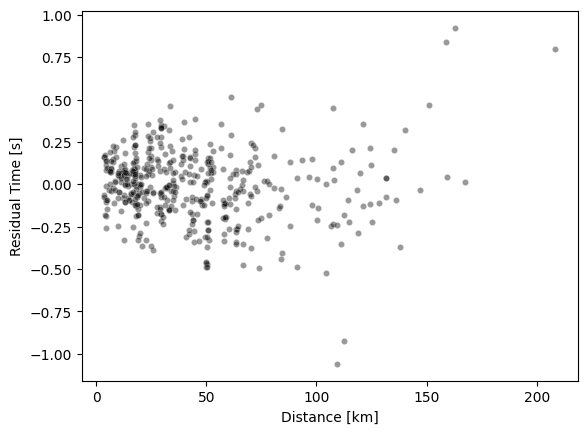

In [6]:
insp.plot_residual_vs_distance(kind='density')
insp.plot_residual_vs_distance(kind='normal')

In [27]:
networks

,station,network
0,MABI,IV
2,SALO,IV
3,BRMO,IV
5,MOSI,SI
7,TUE,MN
...,...,...
398,EWZT2,CH
408,EBUEL,S
410,FUORN,CH
439,VARE,IV


In [41]:
networks = insp.df_phases[['station', 'network']].drop_duplicates()
coords = {'station': [], 'latitude': [], 'longitude': []}
for index, net in networks.iterrows():
    try:
        inventory = client.get_stations(
            network=net.network, station=net.station,
            starttime=t1,
            endtime=t2)
        station = inventory[0][0]
        coords['station'].append(station.code)
        coords['latitude'].append(station.latitude)
        coords['longitude'].append(station.longitude)
    except Exception as error:
        # print(error)
        pass

No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of server:


No data available for request.
HTTP Status code: 204
Detailed response of se

NameError: name 'pd' is not defined

In [47]:
import pandas as pd
coords = pd.DataFrame(coords)

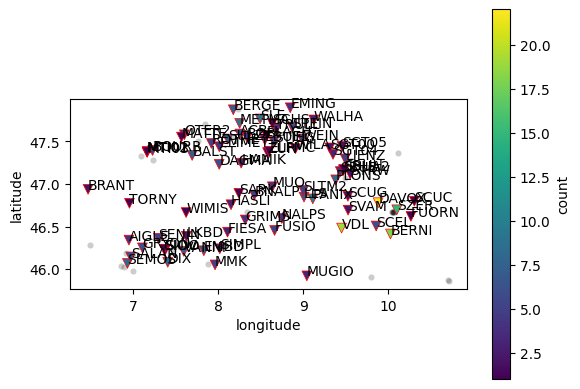

In [46]:
insp.plot_station_participation(coords)

Number of calculated s-p: 168
Number of all phases: 469
Number of P-type phases: 284
Number of S-type phases: 185


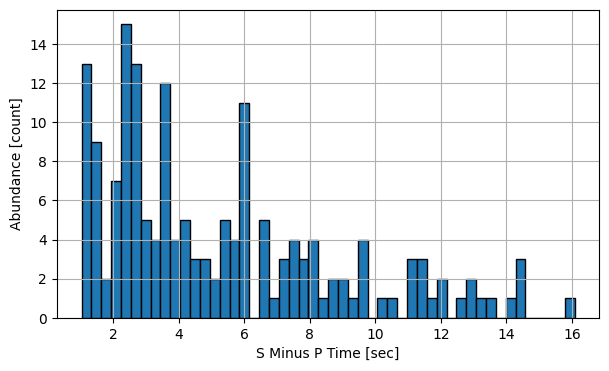

In [8]:
insp.plot_hist_SminusP(bins=50)

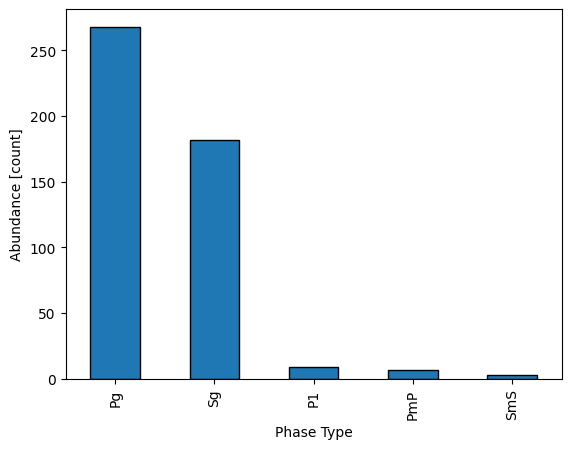

In [9]:
insp.plot_bar_phasetype()

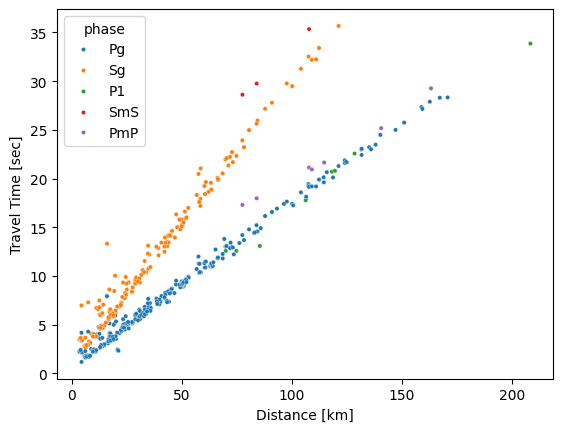

In [10]:
insp.plot_traveltime()

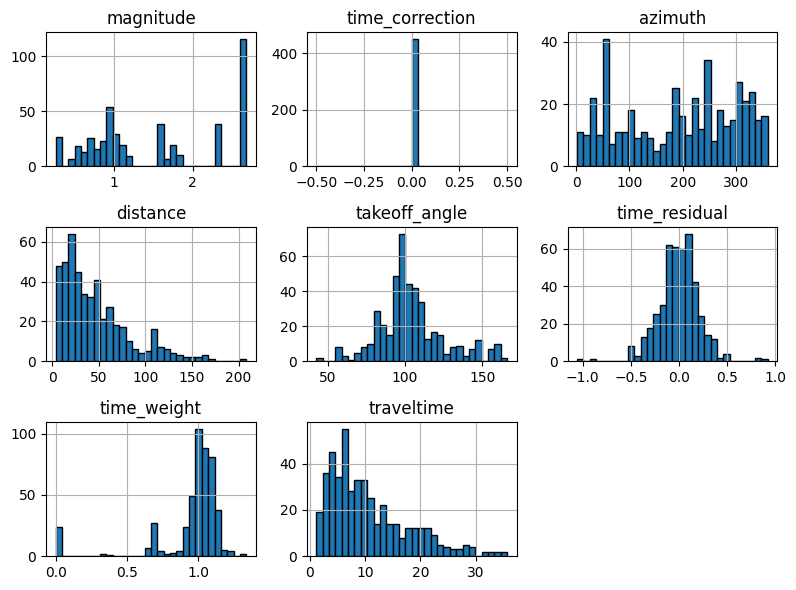

In [11]:
insp.plot_hist_of_numeric(figsize=(8, 6), bins=30, edgecolor='k')

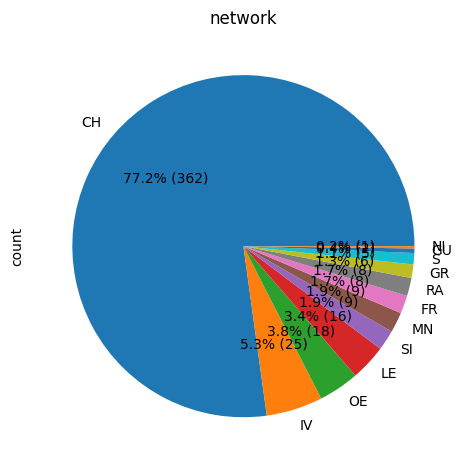

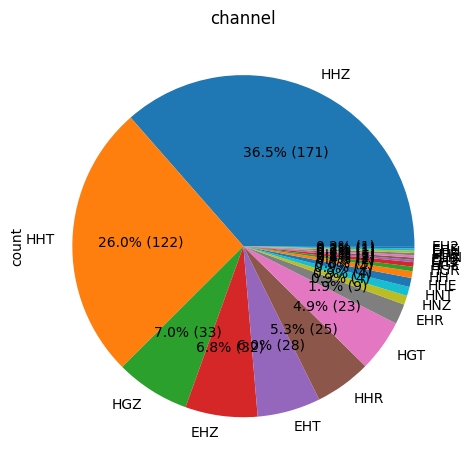

In [12]:
insp.plot_pie_of_none_numeric()

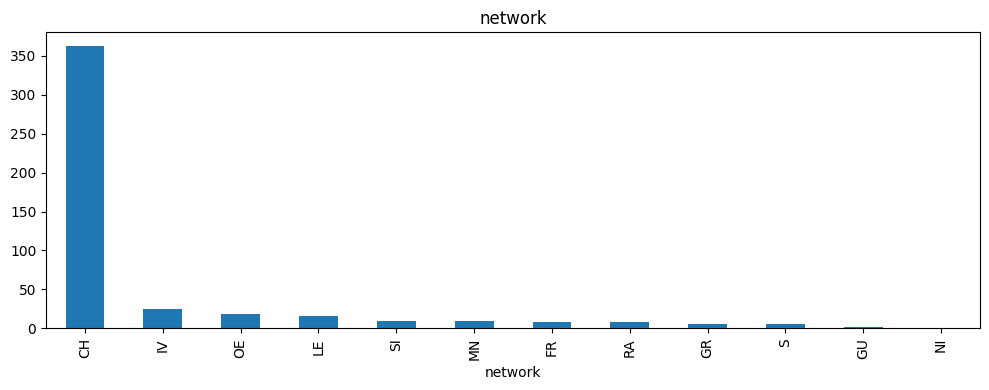

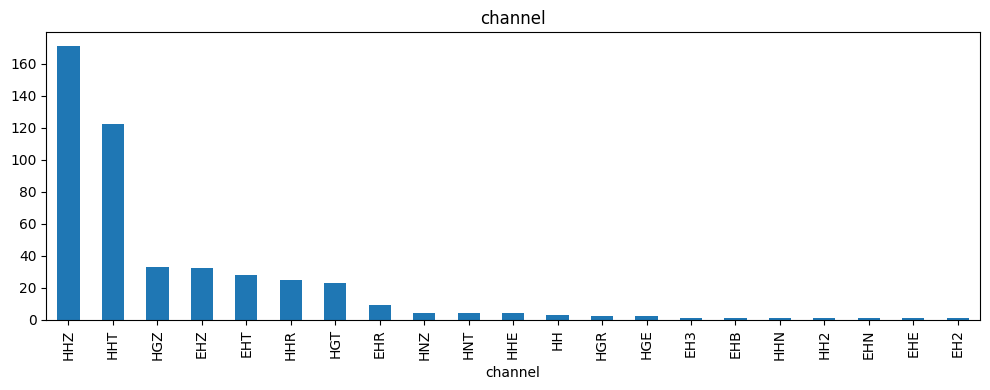

In [13]:
insp.plot_bar_of_none_numeric(figsize=(10, 4))

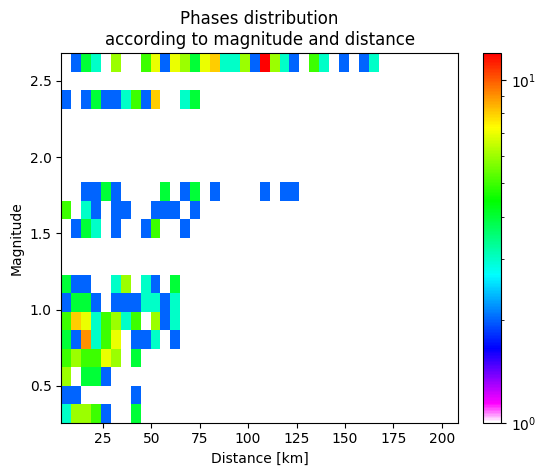

In [14]:
insp.plot_phase_mag_dist()